In [71]:
import pycaret
pycaret.__version__

'3.0.0'

In [4]:
from pycaret.classification import * 
from pycaret.datasets import get_data 

In [10]:
idx = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [11]:
d_set = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
exp = ClassificationExperiment()
exp.setup(d_set, target = 'species', session_id=1004);

,Description,Value
0,Session id,1004
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [36]:
best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9818,0.9929,0.9818,0.9879,0.9806,0.9725,0.9764,0.0150
lda,Linear Discriminant Analysis,0.9818,1.0000,0.9818,0.9855,0.9815,0.9725,0.9747,0.0120
lightgbm,Light Gradient Boosting Machine,0.9818,1.0000,0.9818,0.9855,0.9815,0.9725,0.9747,0.0160
qda,Quadratic Discriminant Analysis,0.9727,1.0000,0.9727,0.9844,0.9683,0.9588,0.9667,0.0120
nb,Naive Bayes,0.9636,0.9948,0.9636,0.9673,0.9633,0.9450,0.9472,0.0120
et,Extra Trees Classifier,0.9627,0.9987,0.9627,0.9731,0.9611,0.9436,0.9499,0.0270
lr,Logistic Regression,0.9527,1.0000,0.9527,0.9686,0.9489,0.9284,0.9381,0.0120
rf,Random Forest Classifier,0.9527,1.0000,0.9527,0.9686,0.9489,0.9284,0.9381,0.0260
gbc,Gradient Boosting Classifier,0.9527,1.0000,0.9527,0.9686,0.9489,0.9284,0.9381,0.0290
dt,Decision Tree Classifier,0.9336,0.9500,0.9336,0.9538,0.9293,0.8995,0.9116,0.0120


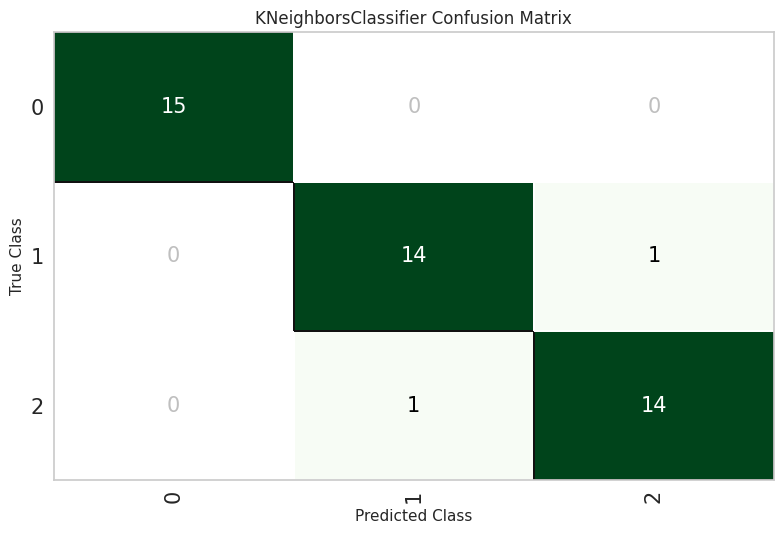

In [37]:
plot_model(best, plot='confusion_matrix')

In [40]:
compare_tree_models = compare_models(include = ['knn', 'rf', 'et', 'gbc', 'lightgbm', 'lda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9727,0.9831,0.9727,0.9782,0.9723,0.9588,0.9620,0.0150
knn,K Neighbors Classifier,0.9718,0.9960,0.9718,0.9780,0.9712,0.9573,0.9609,0.0150
lda,Linear Discriminant Analysis,0.9718,0.9945,0.9718,0.9780,0.9712,0.9573,0.9609,0.0130
rf,Random Forest Classifier,0.9536,0.9948,0.9536,0.9598,0.9531,0.9298,0.9334,0.0260
et,Extra Trees Classifier,0.9536,0.9896,0.9536,0.9598,0.9531,0.9298,0.9334,0.0260
gbc,Gradient Boosting Classifier,0.9436,0.9831,0.9436,0.9523,0.9428,0.9147,0.9195,0.0290


In [41]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9740,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.9481,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.9091,0.9091,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [42]:
lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3576, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [43]:
lg_grid = {'max_depth': [None, 2, 4, 6, 8, 10, 12]}

lg = tune_model(lightgbm, custom_grid = lg_grid, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9740,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.9481,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.9091,0.9091,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 7 candidates, totalling 70 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [44]:
tuned_lg, tuner = tune_model(lightgbm, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.9091,0.9351,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [45]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=FastMemory(location=/tmp/joblib),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['sepal_length',
                                                                          'sepa...
                                        'actual_estimator__reg_alpha': [1e-07,
                                                                        1e-06,
                                                                        0.0001,
                                                                        0.001,
                                                                        0.01,
                                                                        0.0005,
                                                                        0.005,
                                                                        0.05,
                                                                        0.1,
                                                                        0.15,
                                                                        0.2,
                                                                        0.3,
                                                                        0.4,
                                                                        0.5,
                                                                        0.7, 1,
                                                                        2, 3, 4,
                                                                        5, 10],
                                        'actual_estimator__reg_lambda': [1e-07,
                                                                         1e-06,
                                                                         0.0001,
                                                                         0.001,
                                                                         0.01,
                                                                         0.0005,
                                                                         0.005,
                                                                         0.05,
                                                                         0.1,
                                                                         0.15,
                                                                         0.2,
                                                                         0.3,
                                                                         0.4,
                                                                         0.5,
                                                                         0.7, 1,
                                                                         2, 3,
                                                                         4, 5,
                                                                         10]},
                   pre_dispatch='2*n_jobs', random_state=3576, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

## Ensemble 

In [48]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.8571,0.8182,0.8182,0.8182,0.7250,0.7250
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
7,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
8,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616


In [49]:
ensemble_model(dt, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.8571,0.8182,0.8182,0.8182,0.7250,0.7250
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8000,0.8571,0.8000,0.8000,0.8000,0.6970,0.6970


AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=3576,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=3576)

In [50]:
ensemble_model(dt, method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9740,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.9091,0.9156,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
7,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
8,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616


BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=3576,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=3576, verbose=0,
                  warm_start=False)

In [52]:
best_models = compare_models(sort='F1', n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9727,0.9974,0.9727,0.9745,0.9726,0.9588,0.9598,0.0140
lightgbm,Light Gradient Boosting Machine,0.9727,0.9831,0.9727,0.9782,0.9723,0.9588,0.9620,0.0150
knn,K Neighbors Classifier,0.9718,0.9960,0.9718,0.9780,0.9712,0.9573,0.9609,0.0150
lda,Linear Discriminant Analysis,0.9718,0.9945,0.9718,0.9780,0.9712,0.9573,0.9609,0.0130
nb,Naive Bayes,0.9627,0.9974,0.9627,0.9707,0.9620,0.9436,0.9482,0.0120
qda,Quadratic Discriminant Analysis,0.9627,0.9971,0.9627,0.9707,0.9620,0.9436,0.9482,0.0120
rf,Random Forest Classifier,0.9536,0.9948,0.9536,0.9598,0.9531,0.9298,0.9334,0.0270
et,Extra Trees Classifier,0.9536,0.9896,0.9536,0.9598,0.9531,0.9298,0.9334,0.0250
gbc,Gradient Boosting Classifier,0.9436,0.9831,0.9436,0.9523,0.9428,0.9147,0.9195,0.0290
ada,Ada Boost Classifier,0.9427,0.9908,0.9427,0.9557,0.9414,0.9133,0.9205,0.0220


In [54]:
# blending ensemble
blend_models(best_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.9091,0.9740,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=3576,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Light Gradient Boosting Machine',
                              LGBMClassifier(boosting_type=...
                                             random_state=3576, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn',
                                             subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0)),
                             ('K Neighbors Classifier',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=-1, n_neighbors=5,
                                                   p=2, weights='uniform'))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [55]:
# stacking ensemble
stack_models(best_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.9091,0.9740,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616


StackingClassifier(cv=5,
                   estimators=[('Logistic Regression',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=3576,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('Light Gradient Boosting Machine',
                                LGBMClassifier(boostin...
                                                     n_jobs=-1, n_neighbors=5,
                                                     p=2, weights='uniform'))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=3576,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

In [56]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9740,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.9481,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.9091,0.9091,0.9091,0.9273,0.9076,0.8625,0.8735
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [76]:
lb = get_leaderboard()

In [77]:
lb

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.9727,0.9974,0.9727,0.9745,0.9726,0.9588,0.9598
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9718,0.9960,0.9718,0.9780,0.9712,0.9573,0.9609
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.9627,0.9974,0.9627,0.9707,0.9620,0.9436,0.9482
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9336,0.9500,0.9336,0.9448,0.9325,0.8995,0.9057
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.7727,0.0000,0.7727,0.7506,0.7227,0.6512,0.7054
...,...,...,...,...,...,...,...,...,...
72,Light Gradient Boosting Machine,"(TransformerWrapperWithInverse(exclude=None, i...",0.9727,0.9831,0.9727,0.9782,0.9723,0.9588,0.9620
73,Dummy Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.2864,0.5000,0.2864,0.0822,0.1277,0.0000,0.0000
74,Voting Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9727,0.9974,0.9727,0.9782,0.9723,0.9588,0.9620


## AutoML

- This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [82]:
automl()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3576, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Save or Load

In [84]:
save_model(best, 'my_model') # pkl

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=Non...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                      

In [85]:
load_previous_model = load_model('my_model')

Transformation Pipeline and Model Successfully Loaded


In [86]:
load_previous_model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=Non...
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('trained_model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [87]:
save_experiment('my_experiment')

In [91]:
load_previous_experiment = load_experiment('my_experiment', data=d_set)

,Description,Value
0,Session id,8375
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True
